<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Projeto Final
Caderno de **Aula**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Projetos**: Exploração de dados de clientes inadiplentes

## 1\.  Descrição do cenário

 inadiplência afetava o final de 2023, aproximadamente, 40% dos brasileiros, segundo a CNN em [Inadimplência volta a subir no Brasil em ano de debates sobre juros e endividamento](https://www.cnnbrasil.com.br/economia/macroeconomia/inadimplencia-volta-a-subir-no-brasil-em-ano-de-debates-sobre-juros-e-endividamento/). A inadimplência leva a vida finaceira do consumidor a uma série de complicações financieras, afetando, diretamente, o acesso de crédito e empréstimos pelo indivíduo, e prejudicar seu score de crédito. Indiretamente, esse individamento dificulta o acesso ao serviço de internet, água, entre outras necessidades. Já estar em um bom cenário de crédito é interesse de qualquer pessoa, seja ela endividada ou não, uma vez que determina o acesso ao crédito, as melhores taxas de financiamento, os serviços disponíveis e outros benefícios.

Os dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv) são referentes aos clientes de uma instituição finaceira. Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



## 2\. Importação de bibliotecas

In [279]:
#biblioteca padrão
import numpy as np

#biblioteca extra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3\. Importação da base de dados

Leitura de dados num dataframe `pandas`.

In [280]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

## 4\. Exploração dos dados

In [281]:
df.head(n=15)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **4.1. Estrutura dos dados**

Esturutura dos conjuntos de dados gerais

In [282]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

Esturutura dos conjuntos de dados adimplentes

In [283]:
df[df['default'] == 0].shape

(8500, 16)

Esturutura dos conjuntos de dados inadimplentes

In [284]:
df[df['default'] == 1].shape

(1627, 16)

In [285]:
#Cálculos de valores absolutos
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

#Cáluclos %
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **4.2. Análise do tipo de dados**

 - Colunas e seus respectivos tipos de dados.

In [286]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [287]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [288]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **4.3. Análise dos dados nulos/faltantes**

Na base crua analisada dados nulos estão representados por "na", já tratados na importação. Os dados que se seguem apresentam as colunas com valores nulos, nomeadas escolaridade, estado civil e salario anual, como já poderiamos notar na análise de tipos categóricos.

In [289]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [290]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [291]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [292]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [293]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 5\. Transformação e limpeza de dados

Conhecendo a natureza do nosso conjunto de dados, devemos conduzir a *data wrangling*. Em especial, vamos:

 - Corrigir o tipo das nossas colunas;
 - Remover os dados faltantes.

### **5.1. Correção do tipo de dado**

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas `object`, devido a forma como os valores estão escritos na base (usando "." para separar milhar e "," para separar decimal)

In [294]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [295]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

#Teste
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse. Para confirmar a correção descrevemos, nvamente, os tipos de dados das colunas citadas

In [296]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

#Descriçaõ das colunas
df[['valor_transacoes_12m', 'limite_credito']].dtypes

valor_transacoes_12m    float64
limite_credito          float64
dtype: object

 - Atributos **categóricos**.

In [297]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [298]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **5.2. Remoção de dados faltantes**

Remoção das linhas problemáticas por pandas.

In [299]:
df.dropna(inplace=True)

Analise da estrutura dos dados, novamente.

In [300]:
df.shape

(7081, 16)

In [301]:
df[df['default'] == 0].shape

(5968, 16)

In [302]:
df[df['default'] == 1].shape

(1113, 16)

In [303]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

#Comparativo entre a base de dados pré e pós exclusão das linhas com dados nulos
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 6\. Visualização de dados

Os dados estão prontos então, vamos criar diversas visualizações para correlacionar variáveis buscando entender qual fator leva um cliente a inadimplencia. Para isso, vamos comparar a base com todos os clientes com a base de adimplentes e inadimplentes, considreando as diretrizes da LGPD.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [304]:
sns.set_style("darkgrid")
sns.set_color_codes(palette="pastel")

In [305]:
df_adimplente = df[df['default'] == 0]

In [306]:
df_inadimplente = df[df['default'] == 1]

### **6.1. Visualizações categóricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [307]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - Escolaridade

In [308]:
def graf_bar (coluna):


  # Combinar os dataframes
  df_combined = pd.concat([df_adimplente[coluna].value_counts().rename('Adimplentes'),
                          df_inadimplente[coluna].value_counts().rename('Inadimplentes')],
                        axis=1, sort=False).fillna(0)

  # Ordenar o dataframe pelo índice (valores únicos em 'escolaridade')
  df_combined = df_combined.sort_index()

  # Plotar o gráfico de barras
  fig, ax = plt.subplots(figsize=(13, 6))

  df_combined.plot(kind='bar', stacked=True, ax=ax)

  ax.set_title(coluna.capitalize()+' dos Clientes', fontsize=16)
  ax.set_xlabel(coluna.capitalize(), fontsize=14)
  ax.set_ylabel('Frequência Absoluta', fontsize=14)
  ax.legend(title='Situação de Pagamento', fontsize=12)

  plt.xticks(rotation=90)
  plt.show()

In [309]:
def graf_pie (coluna):

  titulos = [coluna.capitalize() + ' dos Clientes', coluna.capitalize()+ ' dos Clientes Adimplentes', coluna.capitalize() +' dos Clientes Inadimplentes']

  eixo = 0
  max_y = 0
  max_value = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

      df_to_plot = dataframe[coluna].value_counts().to_frame()
      df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
      df_to_plot[coluna] = df_to_plot.index
      df_to_plot.sort_values(by=[coluna], inplace=True)
      df_to_plot.sort_values(by=[coluna])

      # Criação de gráfico de pizza empilhada
      f = eixos[eixo].pie(df_to_plot['frequencia_absoluta'], labels=df_to_plot[coluna], autopct='%1.1f%%', startangle=90)
      eixos[eixo].set_title(titulos[eixo])

      eixo += 1

  figura.suptitle('Distribuição de '+ coluna.capitalize() + '  por Categoria\n', fontsize=16)
  figura.show()

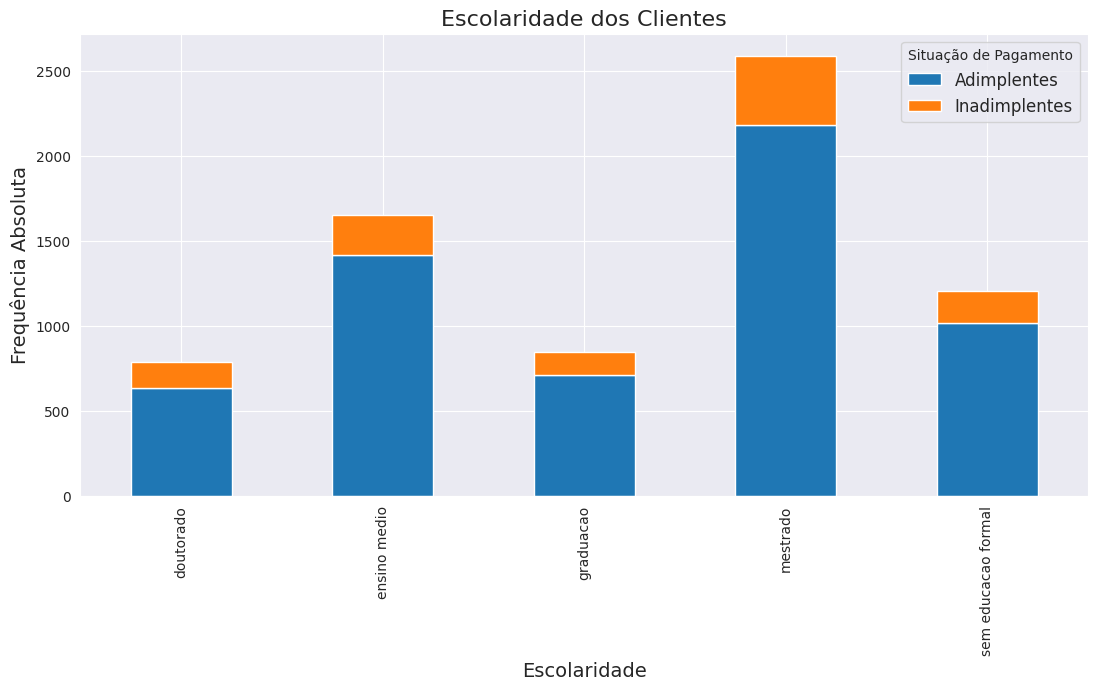


 --------------------------------------------------------------------------------------------------------------------------------------------------------

 --------------------------------------------------------------------------------------------------------------------------------------------------------



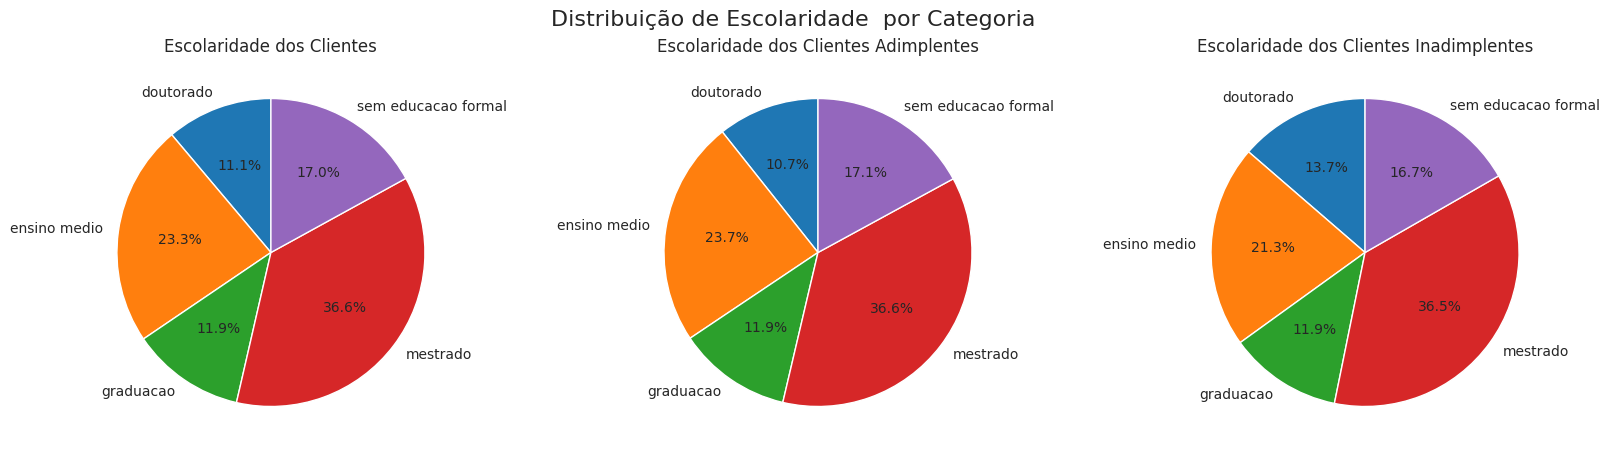

In [310]:
graf_bar('escolaridade')

print("\n --------------------------------------------------------------------------------------------------------------------------------------------------------")
print("\n --------------------------------------------------------------------------------------------------------------------------------------------------------\n")

graf_pie('escolaridade')

 - Salário Anual

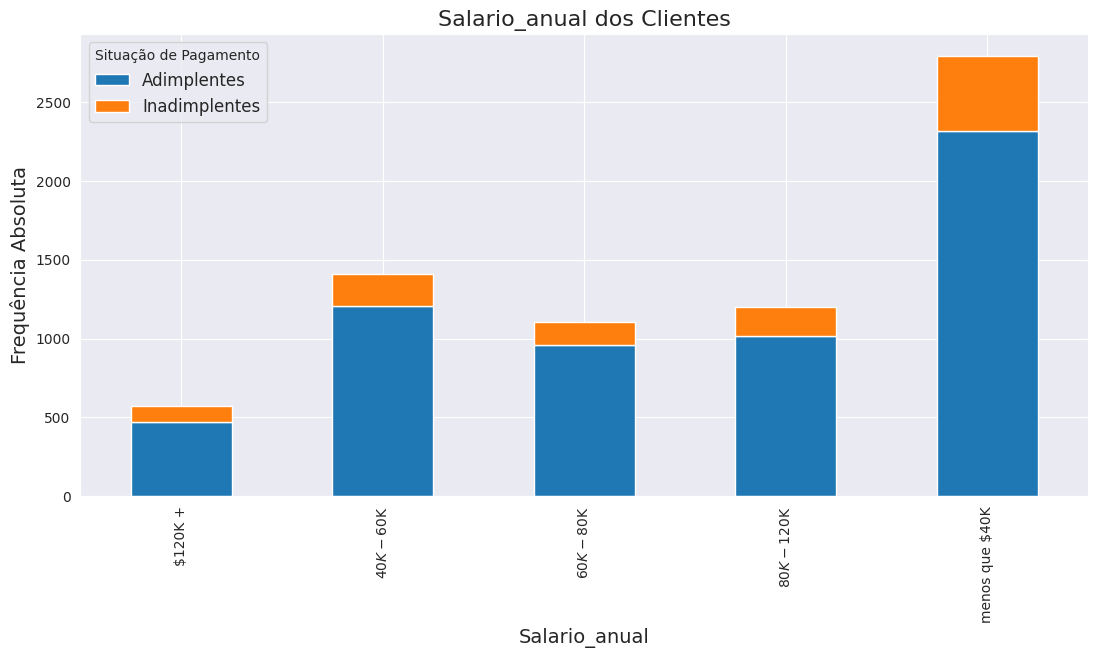


 --------------------------------------------------------------------------------------------------------------------------------------------------------

 --------------------------------------------------------------------------------------------------------------------------------------------------------



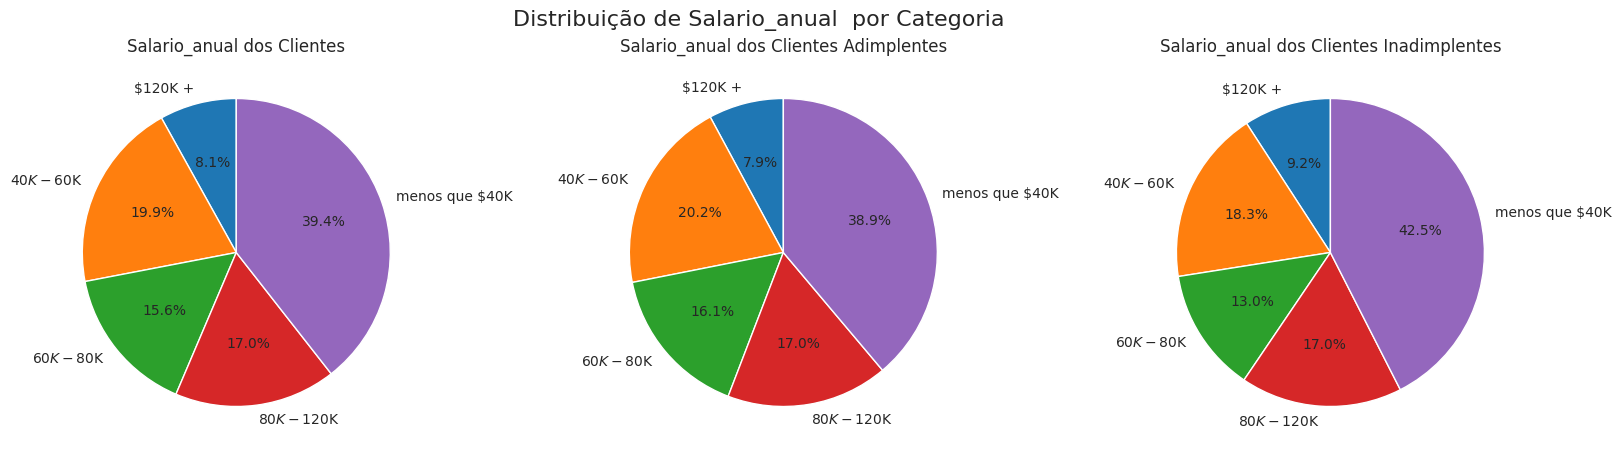

In [311]:
graf_bar('salario_anual')

print("\n --------------------------------------------------------------------------------------------------------------------------------------------------------")
print("\n --------------------------------------------------------------------------------------------------------------------------------------------------------\n")

graf_pie('salario_anual')

### **6.2. Visualizações numéricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [312]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


 - Quantidade de Transações nos Últimos 12 Meses

In [313]:
def func_hist(coluna):
  coluna = coluna
  titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

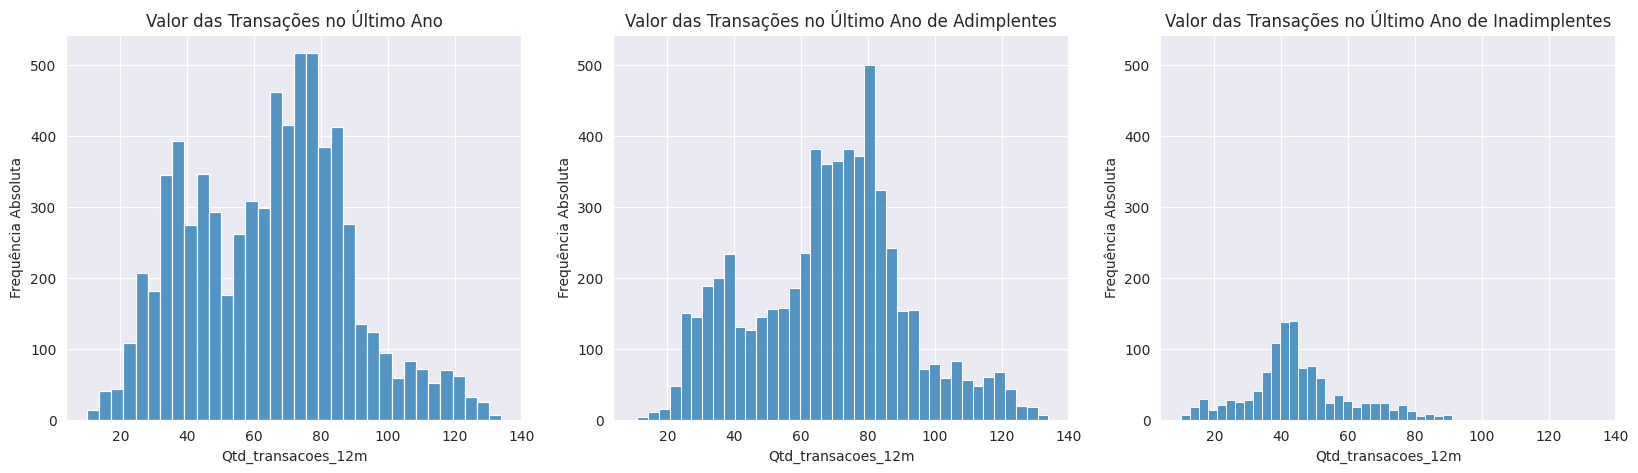

In [314]:
func_hist('qtd_transacoes_12m')


 - Valor das Transações nos Últimos 12 Meses

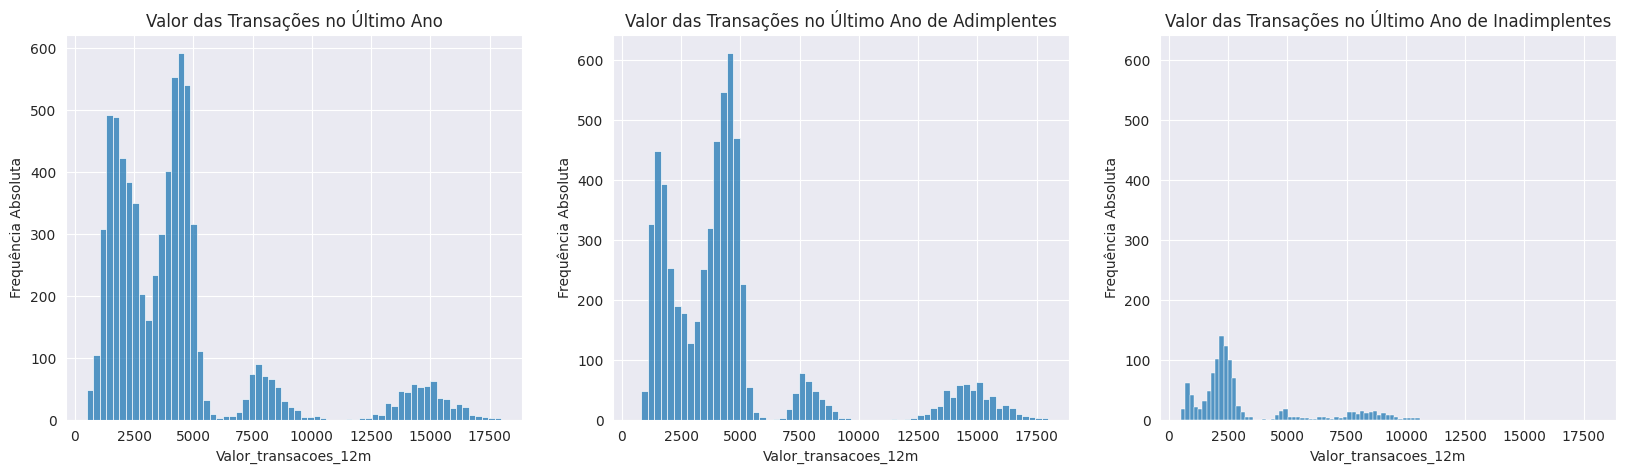

In [315]:
func_hist('valor_transacoes_12m')


 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

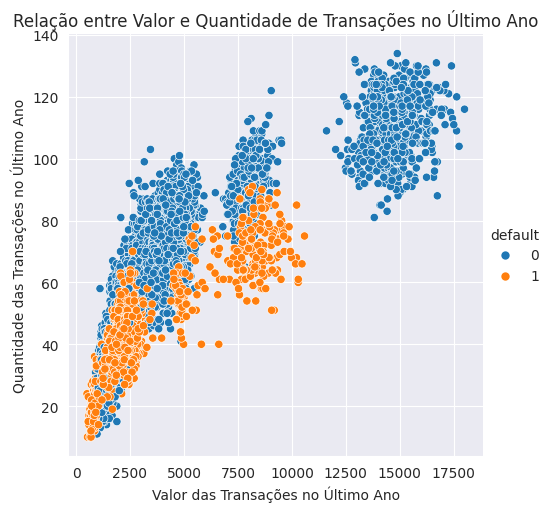

In [316]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

## 7\. Storytelling

Foram analisados dados de 7081 clientes da instituição financeira, sendo desses 1113 inadimplentes e 5968 adimplentes, respectivamente, 15,72% e 84,28% do total.

*Insight 1*: Observa-se que independente do panorâma analisado a proporção de clientes inadimplentes por faixa de salario anual ou escolaridade se mantem a mesma, ou muito próxima, proporcionalidade da base total de  clientes da instituição,sugerindo que nenhuma dessas variáveis exerce influência sobre os dados de inadimplência.

*Insight 2*: Observando os dados de quantidade de transação no último ano percebemos que não há casos de clientes com grandes quantidades (>100) de transação, nesse período, se tornando inadimplentes.

*Insight 3*: Ainda observando os gráficos de quantidade de transação observamos que há maior probabilidade de clientes se tornarem inadimplentes quando entre 40 e 50 transações no período estudado.

*Insight 4*: Um comportamento similar é percebido no gráfico de valores de transição no período do ano anterior, não havendo casos de clientes inadimplentes quando transacionados valores superiores à 11000.


*Insight 5*: Os valores de máximo em realação aos inadimplentes para o mesmo gráfico ocorrem entre 2000 e 3000, a partir valores de transação iguais a 5000 há traços de ocorrência de inadimplencia considerando o universo estudado.

*Insight 6*: Considerando a dispersão entre os valores e quantidades do último ano é observado um crescimento proporcional entre ambas variáveis e clientes inadimplentes, até os valores, aproximados, de 90 transações e valores de 10000. Após essa região do gráfico não há a observação destes.

____